In [55]:
import pandas as pd
from pathlib import Path
# import glob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from math import sqrt

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [57]:
baseball = pd.read_csv('../data/hitters.csv')
baseball.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


## Basic EDA

In [58]:
# size?
baseball.shape

(322, 20)

In [59]:
# any missing data?
baseball.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [60]:
# Establish our target variable: "RUNS"
baseball['Runs'].describe()

count    322.000000
mean      50.909938
std       26.024095
min        0.000000
25%       30.250000
50%       48.000000
75%       69.000000
max      130.000000
Name: Runs, dtype: float64

In [61]:
# To find out our predictors... use "correlations"
corrs = baseball.corr()
corrs['Runs'].sort_values()

Years      0.004541
CWalks     0.182168
CAtBat     0.186497
CHits      0.204830
CRBI       0.205976
Assists    0.220567
CHmRun     0.227913
Errors     0.240475
CRuns      0.250556
PutOuts    0.279347
Salary     0.419859
HmRun      0.650988
Walks      0.732213
RBI        0.798206
AtBat      0.913060
Hits       0.922187
Runs       1.000000
Name: Runs, dtype: float64

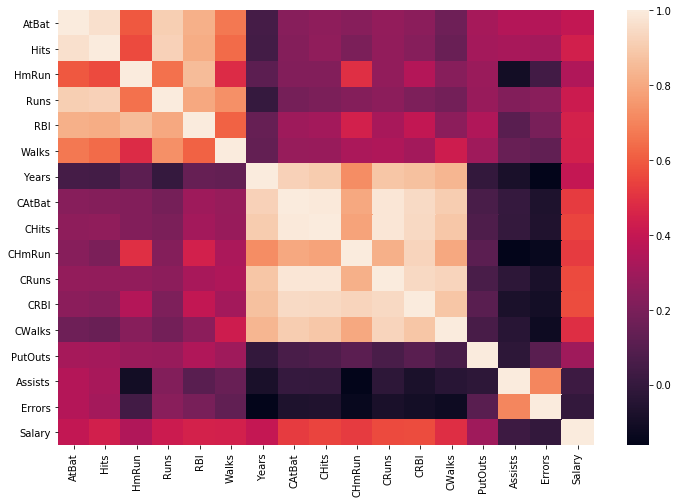

In [62]:
# Display all this as a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corrs);

## Preprocessing

In [63]:
# restrict to relevant features
smallball= baseball[['AtBat', 'Hits', 'HmRun', 'RBI', 'Walks']]

In [64]:
# are they on the same scale?
smallball.describe()

,AtBat,Hits,HmRun,RBI,Walks
count,322.000000,322.000000,322.000000,322.000000,322.000000
mean,380.928571,101.024845,10.770186,48.027950,38.742236
std,153.404981,46.454741,8.709037,26.166895,21.639327
min,16.000000,1.000000,0.000000,0.000000,0.000000
25%,255.250000,64.000000,4.000000,28.000000,22.000000
50%,379.500000,96.000000,8.000000,44.000000,35.000000
75%,512.000000,137.000000,16.000000,64.750000,53.000000
max,687.000000,238.000000,40.000000,121.000000,105.000000


In [65]:
# standardize our variables
from sklearn.preprocessing import StandardScaler
# instantiate the SKLearn class
std_scaler=StandardScaler()

In [70]:
# "fit" the scaler to our data & then transform the data to the new parameters
std_scaler.fit(smallball)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [71]:
# pickle the fitted scaler
import pickle
filename = open('fitted_scaler.pkl', 'wb')
pickle.dump(std_scaler, filename)
filename.close()

In [72]:
# Now transform
scaled_ball = std_scaler.transform(smallball)

In [21]:
# confirm that that did what we wanted
scaled_df = pd.DataFrame(scaled_ball, columns=smallball.columns)
scaled_df.head()

,AtBat,Hits,HmRun,RBI,Walks
0,-0.574071,-0.755130,-1.123591,-0.728308,-1.145172
1,-0.430437,-0.431732,-0.433579,-0.383827,0.011930
2,0.640293,0.624699,0.831443,0.917547,1.724442
3,0.751283,0.861858,1.061447,1.147201,-0.080638
4,-0.391264,-0.302373,-0.088573,-0.230724,-0.404626


In [24]:
# All the means are close to zero
scaled_df.mean()

AtBat   -8.826618e-17
Hits    -7.378501e-17
HmRun    1.437773e-16
RBI      6.809598e-18
Walks    8.619744e-19
dtype: float64

In [25]:
# All the std devs are close to 1
scaled_df.std()

AtBat    1.001556
Hits     1.001556
HmRun    1.001556
RBI      1.001556
Walks    1.001556
dtype: float64

In [26]:
# Always ALWAYS check for missing data -- sklearn will BOMB otherwise.

## Model Building

In [30]:
# Declare the target variable
y = baseball['Runs'].copy()

In [31]:
# Declare the predictors
X = scaled_df.copy()

In [36]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=12)

In [37]:
# Instantiate the SKlearn algorithm
mymodel = LinearRegression()

In [38]:
# Fit the model to the training dataset
mymodel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
# Predictx the y-values on the testing dataset
y_preds = mymodel.predict(X_test)

In [41]:
# Take a look at the first few predictions and compare to the true values
[round(x,2) for x in y_preds[:5]]

[40.66, 20.61, 65.38, 56.99, 25.28]

In [42]:
# Compare that to the actual runs of the first five players
list(y_test[:5])

[24, 21, 77, 48, 27]

## Evaluate the model

#### The 3 primary metrics for linear regression are:
* root mean square error (RMSE) which means the average error 
* R-squared (which means the amount of variance in the outcome explained by the model)
* scatterplot of true vs. predicted values

In [44]:
# root mean sq error
rmse = sqrt(metrics.mean_squared_error(y_test, y_preds))
rmse

8.278726451261363

In [46]:
# is that more or less than if we just used the average as our model?
avg_val = y_train.mean()
avg_val

51.72199170124481

In [47]:
# what would the error be if I simply predicted the average value for all players?
comparison = np.full((len(y_test), ), avg_val)
comparison

array([51.7219917, 51.7219917, 51.7219917, 51.7219917, 51.7219917,
       51.7219917, 51.7219917, 51.7219917, 51.7219917, 51.7219917,
       51.7219917, 51.7219917, 51.7219917, 51.7219917, 51.7219917,
       51.7219917, 51.7219917, 51.7219917, 51.7219917, 51.7219917,
       51.7219917, 51.7219917, 51.7219917, 51.7219917, 51.7219917,
       51.7219917, 51.7219917, 51.7219917, 51.7219917, 51.7219917,
       51.7219917, 51.7219917, 51.7219917, 51.7219917, 51.7219917,
       51.7219917, 51.7219917, 51.7219917, 51.7219917, 51.7219917,
       51.7219917, 51.7219917, 51.7219917, 51.7219917, 51.7219917,
       51.7219917, 51.7219917, 51.7219917, 51.7219917, 51.7219917,
       51.7219917, 51.7219917, 51.7219917, 51.7219917, 51.7219917,
       51.7219917, 51.7219917, 51.7219917, 51.7219917, 51.7219917,
       51.7219917, 51.7219917, 51.7219917, 51.7219917, 51.7219917,
       51.7219917, 51.7219917, 51.7219917, 51.7219917, 51.7219917,
       51.7219917, 51.7219917, 51.7219917, 51.7219917, 51.7219

In [48]:
# compare that to our predictions
y_preds

array([ 40.65651854,  20.61250697,  65.37949186,  56.99404018,
        25.27729166,  -1.2282963 ,  68.71244466,  26.7046452 ,
        45.6250407 ,  -1.80917523,  63.91878118,  69.04366358,
        69.44309129,  82.78405591,  79.65547603,  39.2175495 ,
        53.39024442,  32.2399634 ,  54.88203413,  38.92420938,
        67.36049455,  36.38721488,  63.68662893,  87.30050421,
        47.31109239,  73.91592758,  28.49787563,  84.03022741,
        29.8523366 ,  31.41361613,  58.46114549,  60.51887729,
        48.05140891,  20.61533967,  57.49488904,  71.65627554,
        33.80327782,  38.42043261,  89.97031731,  60.04605478,
        57.39763399,  26.06864536,  27.85691716,  61.57126953,
        38.02520109,  24.66672964,  48.26328293,  45.247333  ,
        20.69289406,  26.63103314, 100.43551075,  69.11642209,
        22.61741412,  50.44372684,  -3.42267341,  23.71401248,
        92.85580801,  43.20747348,  42.82425917,  18.19457475,
        84.65942164,  68.22562838,  56.61082173,  73.13

In [50]:
# compare those two:
sqrt(metrics.mean_squared_error(y_test, comparison))

25.33098226518668

In [51]:
# Second metric: R-2
r2 = metrics.r2_score(y_test, y_preds)
round(r2, 2)

0.89

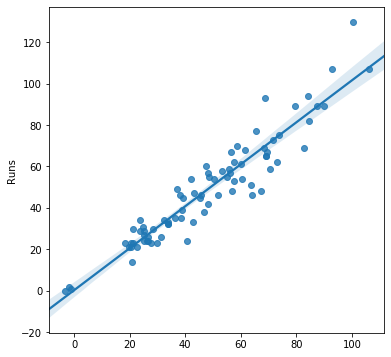

In [53]:
# Third metric: scatterplot
plt.figure(figsize=(6,6))
sns.regplot(x = y_preds, y = y_test);

## Next phase: Predict on new data

In [54]:
# pickle your model!
import pickle
filename = open('final_model.pkl', 'wb')
pickle.dump(mymodel, filename)
filename.close()